<h2 style="text-align: center;">Graph Day 3</h2>


### Question 1. Flood Fill
An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.
You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].
To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.
Return the modified image after performing the flood fill.


### Using ` DFS`

In [3]:
def dfs(row, col, ans, images, color, inicolor):
    ans[row][col] = color ## coloring current cell with new color
    n = len(images)
    m = len(images[0])
    ## Now let's travel through all 4 direction
    del_row = [-1,0,1,0]
    del_col = [0,1,0,-1]
    for i in range(4):
        neighbor_row = row + del_row[i]
        neighbor_col = col + del_col[i]

        if (0<=neighbor_row<n and 0<=neighbor_col<m and
            images[neighbor_row][neighbor_col] == inicolor and
            ans[neighbor_row][neighbor_col]!= color):
            dfs(neighbor_row, neighbor_col, ans, images, color, inicolor)
def floodfill(image, sr,sc,color):
    inicolor = image[sr][sc]
    ans = [row[:] for row in image]
    dfs(sr,sc, ans, image, color, inicolor)
    return ans

image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
color = 2

for i in floodfill(image, sr,sc,color):
    print(i)


[2, 2, 2]
[2, 2, 0]
[2, 0, 1]


### Using `BFS`

In [6]:
from collections import deque

def bfs(sr,sc, ans, image, color, inicolor):
    n = len(image)
    m = len(image[0])
    q = deque([(sr,sc)])
    ans[sr][sc] = color ## coloring the initiale color with new color

    del_row = [-1,0,1,0]
    del_col = [0,1,0,-1]

    while q:
        row, col = q.popleft()

        for i in range(4):
            neighbor_row = row + del_row[i]
            neighbor_col = col + del_col[i]

            ## now let's check boundary conditions and if the neighbor needs to be colored
            if (0 <= neighbor_row < n and 0<= neighbor_col < m and
                image[neighbor_row][neighbor_col] == inicolor and
                ans[neighbor_row][neighbor_col]!=color):
                ans[neighbor_row][neighbor_col] = color
                q.append((neighbor_row,neighbor_col))

def floodfill(image, sr, sc, color):
    inicolor = image[sr][sc]
    ans = [row for row in image]
    bfs(sr, sc, ans, image, color, inicolor)
    return ans

image = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]
sr = 1
sc = 1
color = 2

floodfill(image, sr, sc, color)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

### Question: Rotting Oranges

You are given an m x n grid where each cell can have one of three values:

0 representing an empty cell,
1 representing a fresh orange, or
2 representing a rotten orange.
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

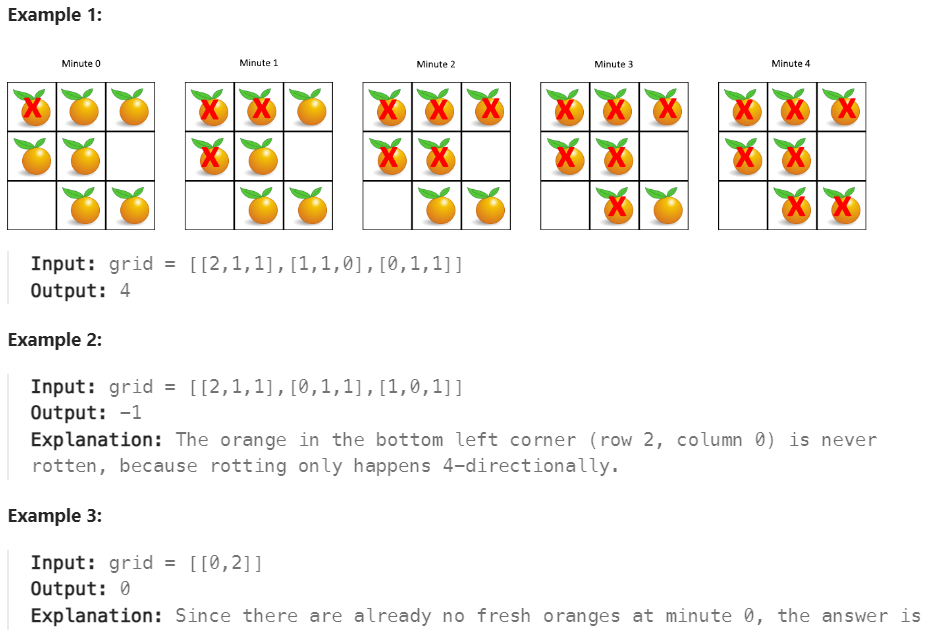

### Intuition:

1. **Grid Representation**: 
   - Each cell in the grid can either be a rotten orange (`2`), a fresh orange (`1`), or empty (`0`).
   - Rotten oranges spread their rot to adjacent (up, down, left, right) fresh oranges.

2. **Breadth-First Search (BFS) Approach**:
   - Use BFS to model the process of rot spreading from initially rotten oranges to adjacent fresh oranges.
   - BFS is suitable here because it processes nodes level by level, which aligns with the way rot spreads over time.

### Approach:

1. **Initialization**:
   - Initialize a queue to keep track of rotten oranges and the time it took for them to rot.
   - Create a `visited` matrix to mark cells that have been processed.
   - Count the number of fresh oranges at the start.

2. **BFS Traversal**:
   - For each rotten orange, attempt to rot its adjacent fresh oranges.
   - Update the time for the rot to spread, and push these newly rotten oranges into the queue with the updated time.
   - Track the maximum time taken for any orange to rot (`tm`).

3. **Check Results**:
   - After BFS completes, check if the number of rotten oranges (`cnt_rotten`) is equal to the initial count of fresh oranges (`cnt_fresh`).
   - If they match, return the maximum time taken (`tm`).
   - If not, return `-1`, indicating that not all fresh oranges can be rotten.


In [14]:
from collections import deque
class Solution:
    def bfs(self, q, vis, grid, n, m):
        del_row = [-1, 0, 1, 0]
        del_col = [0, 1, 0, -1]

        tm = 0
        cnt = 0
        ## Let's Do thE bfs traversal
        while q:
            r,c = q[0][0]
            t = q[0][1]
            q.popleft()
            tm = max(tm,t)
            for i in range(4):
                n_row = r + del_row[i]
                n_col = c + del_col[i]

                if (0<= n_row<n and 0<=n_col<m and vis[n_row][n_col] == 0 and grid[n_row][n_col] == 1):
                    q.append(((n_row, n_col), t+1))
                    vis[n_row][n_col] =2
                    cnt += 1
        return tm, cnt

    def orangesRotting(self, grid):
        n = len(grid)
        m = len(grid[0])
        q = deque()
        vis = [[0]*m for _ in range(n)]
        cnt_fresh = 0

        ## So first let's initilize the Queue for storing the all rotten Orange 
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 2:
                    q.append(((i,j), 0))
                    vis[i][j] = 2
                elif grid[i][j] == 1:
                    cnt_fresh += 1
        tm, cnt_rotten = self.bfs(q,vis,grid,n,m)
        if cnt_rotten != cnt_rotten:
            return -1
        return tm
    
grid = [[2,1,1],[1,1,0],[0,1,1]]
sol = Solution()
sol.orangesRotting(grid)

4

### Question: Island Perimeter

You are given row x col grid representing a map where grid[i][j] = 1 represents land and grid[i][j] = 0 represents water.

Grid cells are connected horizontally/vertically (not diagonally). The grid is completely surrounded by water, and there is exactly one island (i.e., one or more connected land cells).

The island doesn't have "lakes", meaning the water inside isn't connected to the water around the island. One cell is a square with side length 1. The grid is rectangular, width and height don't exceed 100. Determine the perimeter of the island.

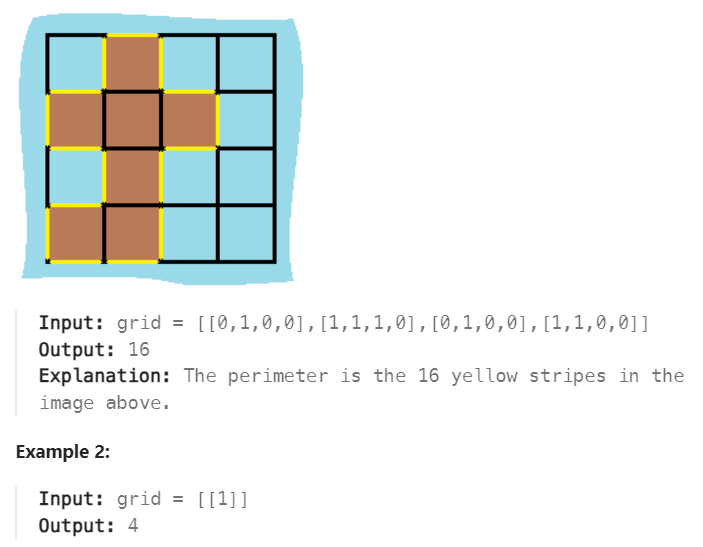

### Intuition

To find the perimeter of an island in a grid where each cell is either land (1) or water (0), we need to count the edges of the land cells that are exposed to water or the boundary of the grid. The perimeter is defined as the total length of these exposed edges.

### Approach

1. **Initialization:**
   - Start with a `perimeter` variable set to `0`.
   - Define movement directions for exploring neighboring cells: up, right, down, and left.

2. **Iteration:**
   - Iterate through each cell in the grid. For each cell that contains land (`1`), check its neighbors.

3. **Neighbor Checks:**
   - For each land cell, check its four possible neighbors:
     - **Up:** (i - 1, j)
     - **Right:** (i, j + 1)
     - **Down:** (i + 1, j)
     - **Left:** (i, j - 1)
   - For each direction, compute the neighbor's row and column indices using the predefined movement arrays (`del_row` and `del_col`).

4. **Boundary and Water Check:**
   - If a neighbor is out of bounds or water (`0`), it means the edge between the current land cell and the neighbor is exposed. Thus, it contributes to the perimeter.
   - Increment the `perimeter` by `1` for each exposed edge.

5. **Return Result:**
   - After checking all cells, return the total `perimeter` value.

### Detailed Explanation

1. **Movement Arrays:**
   - `del_row = [-1, 0, 1, 0]` and `del_col = [0, 1, 0, -1]` help in navigating the grid. These arrays define movements in the four cardinal directions:
     - Up: (-1 row, 0 column)
     - Right: (0 row, +1 column)
     - Down: (+1 row, 0 column)
     - Left: (0 row, -1 column)

2. **Boundary and Water Handling:**
   - **Out of Bounds:** If a neighbor's index is outside the grid's boundaries, it is considered exposed (water).
   - **Water:** If the neighbor cell contains water (`0`), it contributes to the perimeter.

3. **Efficiency:**
   - The algorithm runs in O(m * n) time complexity, where m is the number of rows and n is the number of columns. This is efficient for grids up to the maximum size constraint.

### Example

For a grid:
```
[
  [0, 1, 0, 0],
  [1, 1, 1, 0],
  [0, 1, 0, 0],
  [1, 1, 0, 0]
]
```

- The land cell at (0, 1) has three exposed edges.
- The land cell at (1, 0) also has three exposed edges.
- Other cells contribute similarly based on their neighbors.



In [7]:
class Solution(object):
    def islandperimeter(self, grid):
        perimeter = 0
        del_row = [-1, 0, 1, 0]
        del_col = [0, 1, 0, -1]

        ## Now let's find out the length of row and column
        row = len(grid)
        col = len(grid[0])

        ## Iterate through each cell in the grid
        for i in range(row):
            for j in range(col):
                ## let's find out If the cell is land
                if grid[i][j] ==1:
                    for k in range(4):
                        neighbor_row = i + del_row[k]
                        neighbor_col = j + del_col[k]
                        ## now let's Check if the neighbor is out of boundris or water side then count it as perimeter
                        if (neighbor_row < 0 or neighbor_row >= row or
                        neighbor_col < 0 or neighbor_col >=col or 
                        grid[neighbor_row][neighbor_col] == 0):
                            perimeter += 1
        return perimeter
    


### Now let' call this class 

grid = [
  [0, 1, 0, 0],
  [1, 1, 1, 0],
  [0, 1, 0, 0],
  [1, 1, 0, 0]
]

sol = Solution()
sol.islandperimeter(grid)

16

In [8]:
grid = [[1]]
sol = Solution()
sol.islandperimeter(grid)

4

### Question 

Given an undirected graph with V vertices labelled from 0 to V-1 and E edges, check whether it contains any cycle or not. Graph is in the form of adjacency list where adj[i] contains all the nodes ith node is having edge with.

NOTE: The adjacency list denotes the edges of the graph where edges[i] stores all other vertices to which ith vertex is connected.

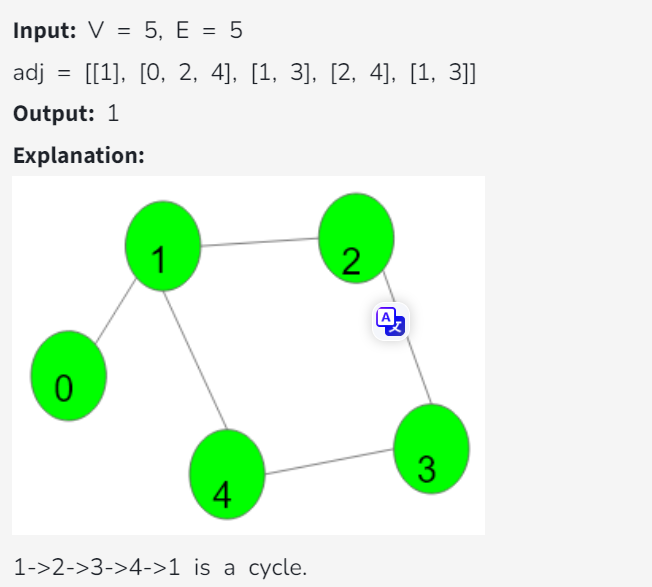

### Intuition:

**Cycle Detection in an Undirected Graph** involves checking whether there is a closed loop in the graph. When traversing the graph using DFS or BFS, if you encounter a node that has already been visited and is not the direct parent of the current node, a cycle exists.

### Approach:

#### **DFS (Depth-First Search) Approach:**
1. **Initialize** a visited array to keep track of the visited nodes.
2. **Traverse each node** of the graph. If the node is unvisited, start a DFS traversal from that node.
3. During the DFS traversal, for each adjacent node:
   - If the adjacent node is unvisited, recursively visit it while marking the current node as its parent.
   - If the adjacent node is visited and it is not the parent of the current node, a cycle is detected.
4. If any DFS traversal detects a cycle, return `True`. Otherwise, return `False` after all nodes are processed.

#### **BFS (Breadth-First Search) Approach:**
1. **Initialize** a visited array to keep track of visited nodes and a queue to perform BFS.
2. **Traverse each node** of the graph. If the node is unvisited, start a BFS traversal from that node.
3. For each node during BFS:
   - For each adjacent node:
     - If the adjacent node is unvisited, mark it as visited and enqueue it, noting the current node as its parent.
     - If the adjacent node is visited and it is not the parent of the current node, a cycle is detected.
4. If any BFS traversal detects a cycle, return `True`. Otherwise, return `False` after all nodes are processed.

### Time Complexity (TC):

- **DFS Approach:**
  - **Traversal Time:** O(V + E)  
    - We visit each vertex (`V`) and each edge (`E`) once during the DFS traversal.
- **BFS Approach:**
  - **Traversal Time:** O(V + E)
    - Similarly, each vertex and edge is visited once during the BFS traversal.

### Space Complexity (SC):

- **DFS Approach:**
  - **Visited Array:** O(V)
  - **Recursion Stack (Call Stack):** O(V) in the worst case, as we may have to recurse for each vertex.

  - **Total SC:** O(V)

- **BFS Approach:**
  - **Visited Array:** O(V)
  - **Queue:** O(V) in the worst case, as all vertices could be enqueued.
  
  - **Total SC:** O(V)


In [17]:
from typing import List
from collections import deque

class Solution:
    def BFS_traversal(self,src , adj, vis):
        vis[src] = 1 ## Let's First visit the starting node in visited array
        q = deque([(src, -1)])
        while q:
            starting_node, parent = q.popleft()
            for neighbor in adj[starting_node]:
                if not vis[neighbor]:
                    vis[neighbor] = 1
                    q.append((neighbor, starting_node))
                elif parent!=neighbor:
                    return True
    ## Now let's Write the fucntion which detect cycle in an undirected graph
    def isCycle(self,v,adj):
        vis = [0]*v
        for i in range(v):
            if not vis[i]:
                if self.BFS_traversal(i, adj, vis):
                    return True
        return False
    

V = 5
E = 5
adj = [[1], [0, 2, 4], [1, 3], [2, 4], [1, 3]] 
sol = Solution()
sol.isCycle(V, adj)

True

In [18]:
from typing import List

class Solution:
    def DFS_traversal(self, node, parent, adj, vis):
        vis[node] = 1  # Marking the current node as visited
        # Traverse all adjacent nodes
        for neighbor in adj[node]:
            if not vis[neighbor]:  # If the neighbor is not visited
                if self.DFS_traversal(neighbor, node, adj, vis):  # Recursively visit the neighbor
                    return True  # If a cycle is detected in recursion, return True
            elif neighbor != parent:  # If the neighbor is visited and is not the parent
                return True  # Cycle detected
        return False  # No cycle detected in this path so we will going to return False
    
    def isCycle(self, v, adj):
        vis = [0] * v  # Initialize visited array
        for i in range(v):
            if not vis[i]:  # If the node is not visited
                if self.DFS_traversal(i, -1, adj, vis):  # Start DFS from the node
                    return True  # Cycle detected
        return False 
V = 5
E = 5
adj = [[1], [0, 2, 4], [1, 3], [2, 4], [1, 3]]
sol = Solution()
print(sol.isCycle(V, adj))  

True
